In [3]:
using Pkg
using Serialization
using DataFrames
using StatsPlots
Pkg.activate("..")
include("dynamics.jl")
include("planner.jl")
include("planner_utils.jl")
include("utils.jl")
include("plotting.jl")
include("mpc.jl")
include("sim.jl")
include("experiments.jl")
include("velocity_obstacles.jl")

  Activating project at `~/repos/ProactiveHRI.jl`


LoadError: LoadError: ArgumentError: Package Interpolations not found in current path.
- Run `import Pkg; Pkg.add("Interpolations")` to install the Interpolations package.
in expression starting at /Users/jaspergeldenbott/repos/ProactiveHRI.jl/src/velocity_obstacles.jl:1

In [4]:
proactiveHRI_robot_cooperative_human_circular = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human_circular.dat")
proactiveHRI_robot_cooperative_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_cooperative_human_head_on.dat")
SFM_robot_cooperative_human_circular = deserialize("../experimental_results/SFM_robot_cooperative_human_circular.dat")
SFM_robot_cooperative_human_head_on = deserialize("../experimental_results/SFM_robot_cooperative_human_head_on.dat")
HJ_robot_cooperative_human_circular = deserialize("../experimental_results/HJ_robot_cooperative_human_circular.dat")
HJ_robot_cooperative_human_head_on = deserialize("../experimental_results/HJ_robot_cooperative_human_head_on.dat")
OC_robot_cooperative_human_circular = deserialize("../experimental_results/OC_robot_cooperative_human_circular.dat")
OC_robot_cooperative_human_head_on = deserialize("../experimental_results/OC_robot_cooperative_human_head_on.dat")

proactiveHRI_robot_oc_human_head_on = deserialize("../experimental_results/ProactiveHRI_robot_oc_human_head_on.dat")
SFM_robot_oc_human_head_on = deserialize("../experimental_results/SFM_robot_oc_human_head_on.dat")
HJ_robot_oc_human_head_on = deserialize("../experimental_results/HJ_robot_oc_human_head_on.dat")
OC_robot_oc_human_head_on = deserialize("../experimental_results/oc_robot_oc_human_head_on.dat")




Dict{String, SimMetrics} with 199 entries:
  "Run 151" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 140" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 20"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 35"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 192" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 127" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 137" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 181" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 15"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 60"  => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 150" => SimMetrics(SimData(IPSimParams(PlannerParams(PlannerHyperparamet…
  "Run 99"  => SimMetrics(SimData(IPSimParams(PlannerParams(Planne

In [5]:
b = ["Ours: Robot"]
for i in 1:198
    push!(b, "Ours: Robot")
end
for i in 1:199
    push!(b, "Ours: Human")
end
for i in 1:199
    push!(b, "SFM: Robot")
end
for i in 1:199
    push!(b, "SFM: Human")
end
for i in 1:199
    push!(b, "HJ: Robot")
end
for i in 1:199
    push!(b, "HJ: Human")
end
for i in 1:199
    push!(b, "OC: Robot")
end
for i in 1:199
    push!(b, "OC: Human")
end

d = ["Ours: "]
for i in 1:198
    push!(d, "Ours: ")
end
for i in 1:199
    push!(d, "Ours:")
end
for i in 1:199
    push!(d, "SFM: ")
end
for i in 1:199
    push!(d, "SFM:")
end
for i in 1:199
    push!(d, "HJ: ")
end
for i in 1:199
    push!(d, "HJ:")
end
for i in 1:199
    push!(d, "OC: ")
end
for i in 1:199
    push!(d, "OC:")
end

In [6]:
PI_ibr_data = [[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199];[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]]

1592-element Vector{Float64}:
 4.7767637449015075
 4.8308511871466635
 4.794514128200691
 4.869988649962186
 4.801452949064725
 4.711696165879048
 4.80867179127615
 4.7379059174423785
 4.708300264264047
 4.830961352373747
 ⋮
 6.489013489114156
 6.25296943292288
 5.605341171690763
 5.989698242205687
 6.180143730089214
 6.106503322145329
 6.006430798419746
 6.18458081679608
 6.13422350234538

In [7]:
nothing_data = [[-90 for i in 1:20]; [-20 for i in 1:40]; [50 for i in 1:20]]
nothing_data_1_string = ["" for i in 1:80]
nothing_data_2_string = [" " for i in 1:80]
nothing_data_3_string = ["  " for i in 1:80]

80-element Vector{String}:
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 ⋮
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "
 "  "

In [8]:
PHRI_robot_df = DataFrame(A=PI_ibr_data[1:199], B=b[1:199])
PHRI_human_df = DataFrame(A=PI_ibr_data[200:398], B=b[200:398])
SFM_robot_df = DataFrame(A=PI_ibr_data[399:597], B=b[399:597])
SFM_human_df = DataFrame(A=PI_ibr_data[598:796], B=b[598:796])
HJ_robot_df = DataFrame(A=PI_ibr_data[797:995], B=b[797:995])
HJ_human_df = DataFrame(A=PI_ibr_data[996:1194], B=b[996:1194])
OC_robot_df = DataFrame(A=PI_ibr_data[1195:1393], B=b[1195:1393])
OC_human_df = DataFrame(A=PI_ibr_data[1393:end], B=b[1393:end])

nothing_df_1 = DataFrame(A=nothing_data, B=nothing_data_1_string)
nothing_df_2 = DataFrame(A=nothing_data, B=nothing_data_2_string)
nothing_df_3 = DataFrame(A=nothing_data, B=nothing_data_3_string)



80×2 DataFrame
 Row │ A      B      
     │ Int64  String 
─────┼───────────────
   1 │   -90
   2 │   -90
   3 │   -90
   4 │   -90
   5 │   -90
   6 │   -90
   7 │   -90
   8 │   -90
  ⋮  │   ⋮      ⋮
  74 │    50
  75 │    50
  76 │    50
  77 │    50
  78 │    50
  79 │    50
  80 │    50
      65 rows omitted

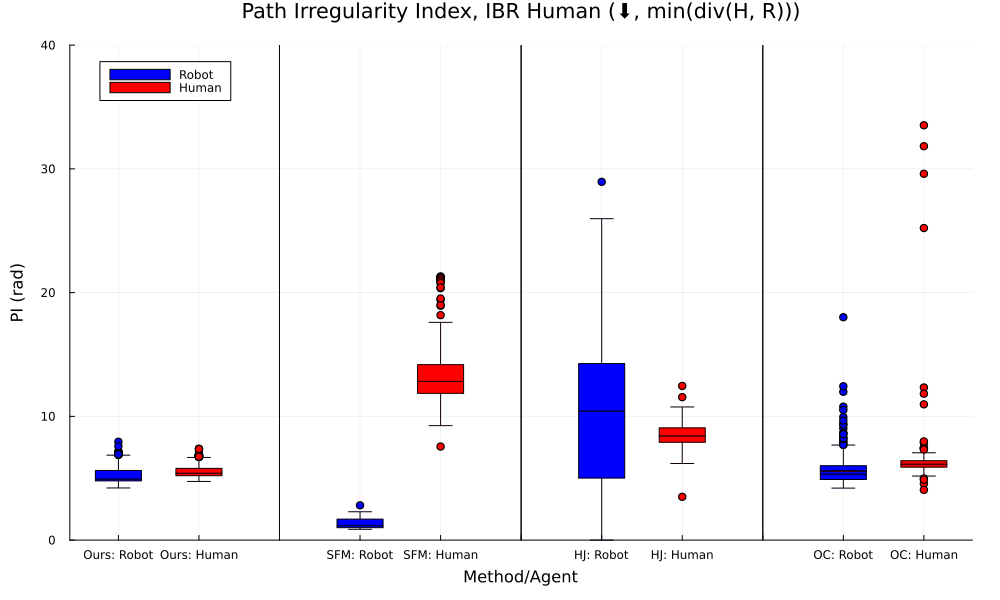

In [9]:
@df PHRI_robot_df boxplot(string.(:B), :A, size=(1000, 600), label="", title="Path Irregularity Index, IBR Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="PI (rad)", margins=5mm, color=:blue, ylims=[0, 40], grid=true)
@df PHRI_human_df boxplot!(string.(:B), :A, color=:red, label="")
@df nothing_df_1 boxplot!(string.(:B), :A, label="")
@df SFM_robot_df boxplot!(string.(:B), :A, color=:blue, label="Robot")
@df SFM_human_df boxplot!(string.(:B), :A, color=:red, label="Human")
@df nothing_df_2 boxplot!(string.(:B), :A, label="")
@df HJ_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
@df HJ_human_df boxplot!(string.(:B), :A, color=:red, label="")
@df nothing_df_3 boxplot!(string.(:B), :A, label="")
@df OC_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
@df OC_human_df boxplot!(string.(:B), :A, color=:red, label="")
# @df PHRI_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df PHRI_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
# @df SFM_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df SFM_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
# @df HJ_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df HJ_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
# @df OC_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
# @df OC_human_df violin!(string.(:B), :A, color=:red, label="", alpha=0.5)

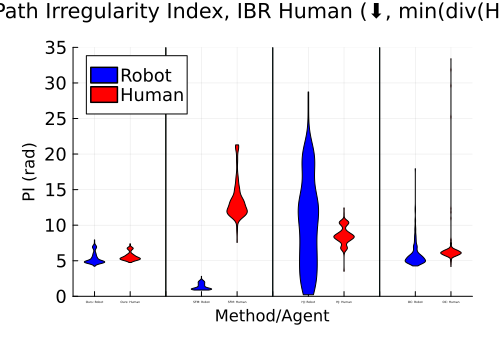

In [10]:
 PI_ibr_plot = @df PHRI_robot_df violin(string.(:B), :A, size=(500, 350), label="Robot", title="Path Irregularity Index, IBR Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="PI (rad)", margins=5mm, color=:blue, ylims=[0, 35], ytickfontsize=12, xtickfontsize=2, legendfontsize=12)
# @df PHRI_human_df boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_1 boxplot!(string.(:B), :A, label="", color=)
# @df SFM_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
# @df SFM_human_df boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_2 boxplot!(string.(:B), :A, label="")
# @df HJ_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
# @df HJ_human_df boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_3 boxplot!(string.(:B), :A, label="")
# @df OC_robot_df boxplot!(string.(:B), :A, color=:blue, label="")
# @df OC_human_df boxplot!(string.(:B), :A, color=:red, label="")
# @df PHRI_robot_df violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df PHRI_human_df violin!(PI_ibr_plot, string.(:B), :A, color=:red, label="Human")
@df nothing_df_1 boxplot!(PI_ibr_plot, string.(:B), :A, label="")
@df SFM_robot_df violin!(PI_ibr_plot, string.(:B), :A, color=:blue, label="")
@df SFM_human_df violin!(PI_ibr_plot, string.(:B), :A, color=:red, label="")
@df nothing_df_2 boxplot!(PI_ibr_plot, string.(:B), :A, label="")
@df HJ_robot_df violin!(PI_ibr_plot, string.(:B), :A, color=:blue, label="")
@df HJ_human_df violin!(PI_ibr_plot, string.(:B), :A, color=:red, label="")
@df nothing_df_3 boxplot!(PI_ibr_plot, string.(:B), :A, label="")
@df OC_robot_df violin!(PI_ibr_plot, string.(:B), :A, color=:blue, label="")
@df OC_human_df violin!(PI_ibr_plot, string.(:B), :A, color=:red, label="")
# scatter!([/.5], [2])
PI_ibr_human_big = plot(PI_ibr_plot, size=(1000, 600))
PI_ibr_human_small = plot(PI_ibr_plot, size=(500, 350))

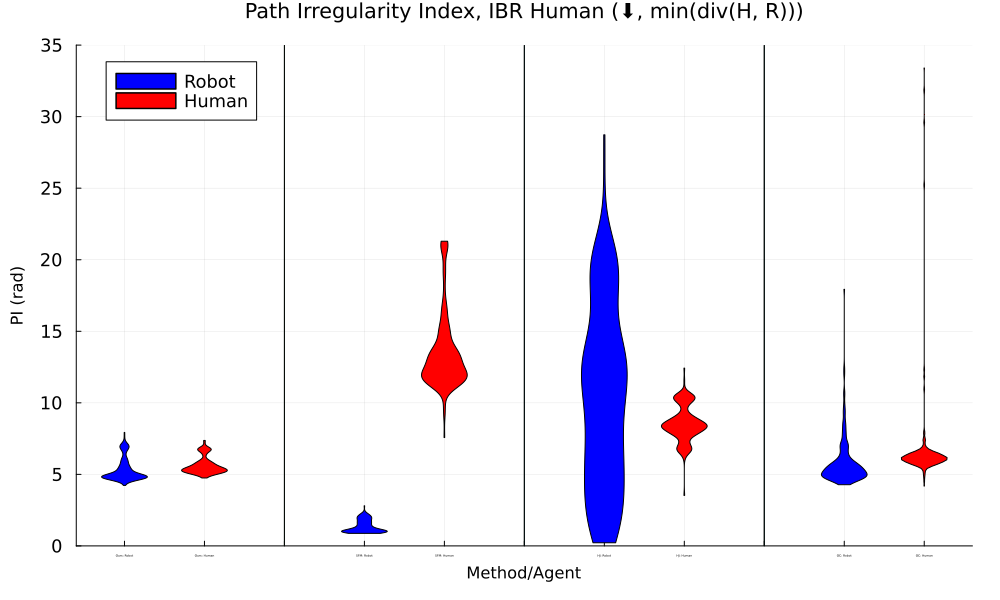

In [11]:
PI_ibr_human_big

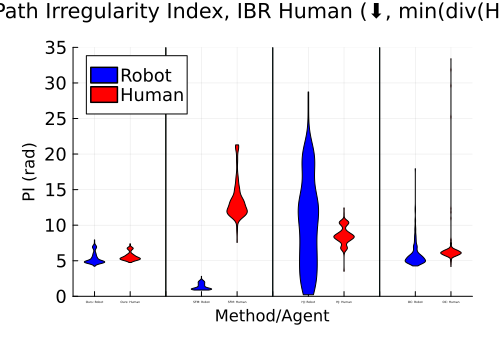

In [12]:
PI_ibr_human_small

In [13]:
PI_oc_data = [[proactiveHRI_robot_oc_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199];[proactiveHRI_robot_oc_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [SFM_robot_oc_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [SFM_robot_oc_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [HJ_robot_oc_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [HJ_robot_oc_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]; [OC_robot_oc_human_head_on["Run $(i)"].PI["ego PI"] for i in 1:199]; [OC_robot_oc_human_head_on["Run $(i)"].PI["other PI"] for i in 1:199]]

1592-element Vector{Float64}:
 4.603281533612452
 6.034725854316564
 4.8551405902294915
 6.186742849442524
 6.106326511542004
 6.155830905078191
 4.709679106473374
 6.225618666574269
 6.140228788307319
 6.13952301729431
 ⋮
 6.467777331038515
 6.893565787968437
 8.171391931816554
 6.366008809640642
 5.972079926524509
 6.221990465455149
 6.4658641976913
 6.442364173925447
 5.619705776925547

In [14]:
PHRI_robot_df_oc = DataFrame(A=PI_oc_data[1:199], B=d[1:199])
PHRI_human_df_oc = DataFrame(A=PI_oc_data[200:398], B=d[200:398])
SFM_robot_df_oc = DataFrame(A=PI_oc_data[399:597], B=d[399:597])
SFM_human_df_oc = DataFrame(A=PI_oc_data[598:796], B=d[598:796])
HJ_robot_df_oc = DataFrame(A=PI_oc_data[797:995], B=d[797:995])
HJ_human_df_oc = DataFrame(A=PI_oc_data[996:1194], B=d[996:1194])
OC_robot_df_oc = DataFrame(A=PI_oc_data[1195:1393], B=d[1195:1393])
OC_human_df_oc = DataFrame(A=PI_oc_data[1393:end], B=d[1393:end])

200×2 DataFrame
 Row │ A        B      
     │ Float64  String 
─────┼─────────────────
   1 │ 5.80836  OC:
   2 │ 6.81516  OC:
   3 │ 6.65472  OC:
   4 │ 9.20711  OC:
   5 │ 6.29739  OC:
   6 │ 5.59416  OC:
   7 │ 6.78738  OC:
   8 │ 9.61482  OC:
  ⋮  │    ⋮       ⋮
 194 │ 8.17139  OC:
 195 │ 6.36601  OC:
 196 │ 5.97208  OC:
 197 │ 6.22199  OC:
 198 │ 6.46586  OC:
 199 │ 6.44236  OC:
 200 │ 5.61971  OC:
       185 rows omitted

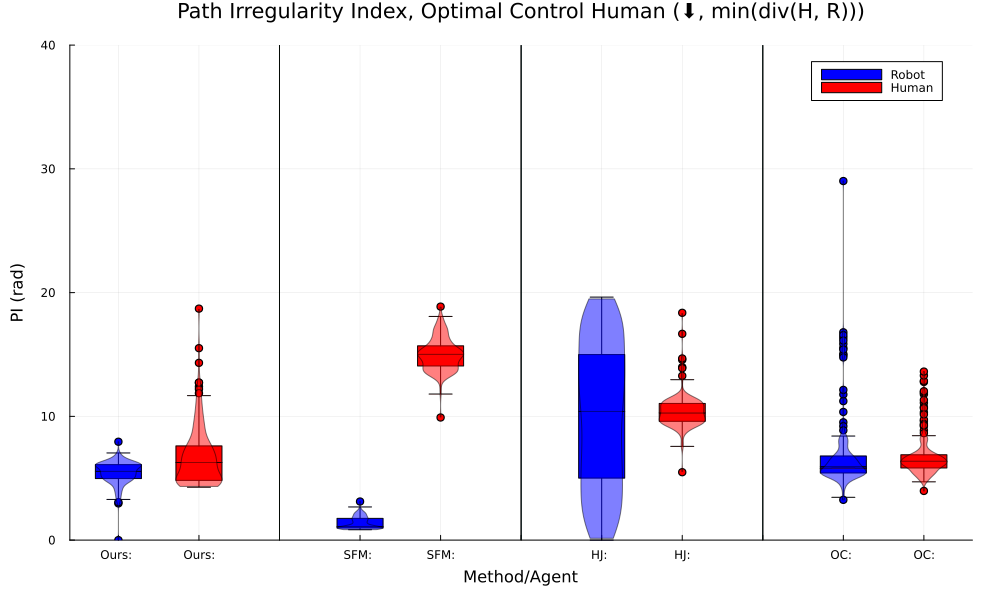

In [15]:
@df PHRI_robot_df_oc boxplot(string.(:B), :A, size=(1000, 600), label="", title="Path Irregularity Index, Optimal Control Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="PI (rad)", margins=5mm, color=:blue, ylims=[0, 40], grid=true)
@df PHRI_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
@df nothing_df_1 boxplot!(string.(:B), :A, label="")
@df SFM_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="Robot")
@df SFM_human_df_oc boxplot!(string.(:B), :A, color=:red, label="Human")
@df nothing_df_2 boxplot!(string.(:B), :A, label="")
@df HJ_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="")
@df HJ_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
@df nothing_df_3 boxplot!(string.(:B), :A, label="")
@df OC_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="")
@df OC_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
@df PHRI_robot_df_oc violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df PHRI_human_df_oc violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
@df SFM_robot_df_oc violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df SFM_human_df_oc violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
@df HJ_robot_df_oc violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df HJ_human_df_oc violin!(string.(:B), :A, color=:red, label="", alpha=0.5)
@df OC_robot_df_oc violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df OC_human_df_oc violin!(string.(:B), :A, color=:red, label="", alpha=0.5)

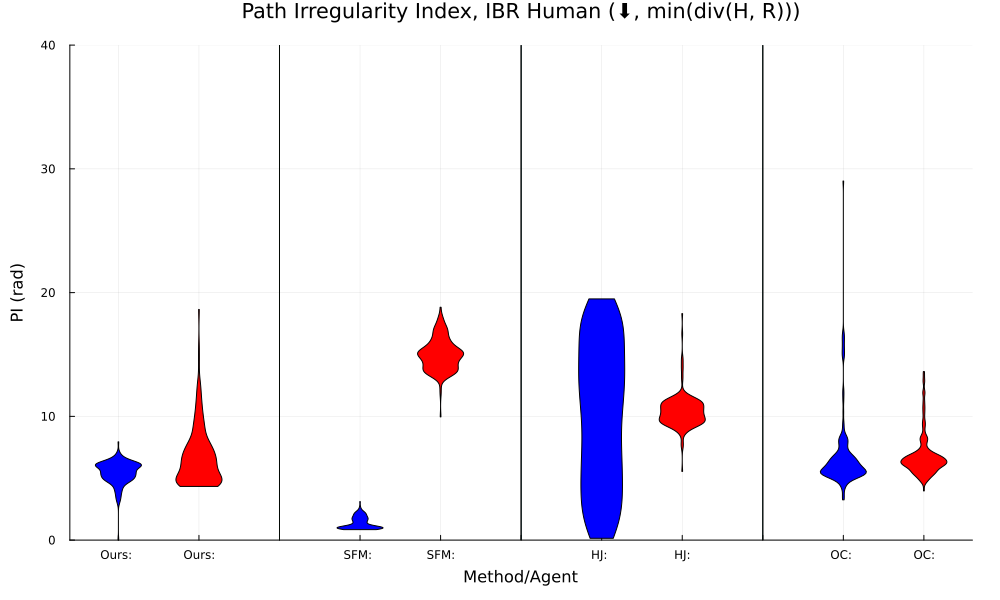

In [16]:
@df PHRI_robot_df_oc violin(string.(:B), :A, size=(1000, 600), label="", title="Path Irregularity Index, IBR Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="PI (rad)", margins=5mm, color=:blue, ylims=[0, 40])
# @df PHRI_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_1 boxplot!(string.(:B), :A, label="", color=)
# @df SFM_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="")
# @df SFM_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_2 boxplot!(string.(:B), :A, label="")
# @df HJ_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="")
# @df HJ_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
# @df nothing_df_3 boxplot!(string.(:B), :A, label="")
# @df OC_robot_df_oc boxplot!(string.(:B), :A, color=:blue, label="")
# @df OC_human_df_oc boxplot!(string.(:B), :A, color=:red, label="")
# @df PHRI_robot_df_oc violin!(string.(:B), :A, color=:blue, label="", alpha=0.5)
@df PHRI_human_df_oc violin!(string.(:B), :A, color=:red, label="")
@df nothing_df_1 boxplot!(string.(:B), :A, label="")
@df SFM_robot_df_oc violin!(string.(:B), :A, color=:blue, label="")
@df SFM_human_df_oc violin!(string.(:B), :A, color=:red, label="")
@df nothing_df_2 boxplot!(string.(:B), :A, label="")
@df HJ_robot_df_oc violin!(string.(:B), :A, color=:blue, label="")
@df HJ_human_df_oc violin!(string.(:B), :A, color=:red, label="")
@df nothing_df_3 boxplot!(string.(:B), :A, label="")
@df OC_robot_df_oc violin!(string.(:B), :A, color=:blue, label="")
@df OC_human_df_oc violin!(string.(:B), :A, color=:red, label="")

# Task Completion Plot

In [17]:
d2g_data = [[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199];[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]]

d2g_oc_data = [[proactiveHRI_robot_oc_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199];[proactiveHRI_robot_oc_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]; [SFM_robot_oc_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199]; [SFM_robot_oc_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]; [HJ_robot_oc_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199]; [HJ_robot_oc_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]; [OC_robot_oc_human_head_on["Run $(i)"].dist_to_goal["ego dist to goal"] for i in 1:199]; [OC_robot_oc_human_head_on["Run $(i)"].dist_to_goal["other dist to goal"] for i in 1:199]]


1592-element Vector{Float64}:
 3.3713759475681613
 3.387358801967149
 3.356404107960248
 3.376790531473167
 3.3702112990766646
 3.374684852954401
 3.3756444441078424
 3.436869221815926
 3.456975886618971
 3.3925211443565564
 ⋮
 3.336987562812035
 3.3424495881948757
 3.4026519824881163
 3.343081659961686
 3.321704964477609
 3.322530406037456
 3.339742354448002
 3.339653039672402
 3.3163767378568982

In [18]:
PHRI_robot_df_d2g = DataFrame(A=d2g_data[1:199], B=b[1:199])
PHRI_human_df_d2g = DataFrame(A=d2g_data[200:398], B=b[200:398])
SFM_robot_df_d2g = DataFrame(A=d2g_data[399:597], B=b[399:597])
SFM_human_df_d2g = DataFrame(A=d2g_data[598:796], B=b[598:796])
HJ_robot_df_d2g = DataFrame(A=d2g_data[797:995], B=b[797:995])
HJ_human_df_d2g = DataFrame(A=d2g_data[996:1194], B=b[996:1194])
OC_robot_df_d2g = DataFrame(A=d2g_data[1195:1393], B=b[1195:1393])
OC_human_df_d2g = DataFrame(A=d2g_data[1393:end], B=b[1393:end])

PHRI_robot_df_d2g_oc = DataFrame(A=d2g_oc_data[1:199], B=d[1:199])
PHRI_human_df_d2g_oc = DataFrame(A=d2g_oc_data[200:398], B=d[200:398])
SFM_robot_df_d2g_oc = DataFrame(A=d2g_oc_data[399:597], B=d[399:597])
SFM_human_df_d2g_oc = DataFrame(A=d2g_oc_data[598:796], B=d[598:796])
HJ_robot_df_d2g_oc = DataFrame(A=d2g_oc_data[797:995], B=d[797:995])
HJ_human_df_d2g_oc = DataFrame(A=d2g_oc_data[996:1194], B=d[996:1194])
OC_robot_df_d2g_oc = DataFrame(A=d2g_oc_data[1195:1393], B=d[1195:1393])
OC_human_df_d2g_oc = DataFrame(A=d2g_oc_data[1393:end], B=d[1393:end])

200×2 DataFrame
 Row │ A        B      
     │ Float64  String 
─────┼─────────────────
   1 │ 3.33013  OC:
   2 │ 3.36284  OC:
   3 │ 3.33364  OC:
   4 │ 3.55975  OC:
   5 │ 3.33778  OC:
   6 │ 3.33927  OC:
   7 │ 3.3691   OC:
   8 │ 3.51744  OC:
  ⋮  │    ⋮       ⋮
 194 │ 3.40265  OC:
 195 │ 3.34308  OC:
 196 │ 3.3217   OC:
 197 │ 3.32253  OC:
 198 │ 3.33974  OC:
 199 │ 3.33965  OC:
 200 │ 3.31638  OC:
       185 rows omitted

In [19]:
# d2g_ibr_human_plot = @df PHRI_robot_df_d2g boxplot(string.(:B), :A, size=(1000, 600), label="", title="Distance to Goal, IBR Human (⬇, min(div(H, R)))", xlabel="Method/Agent", ylabel="Distance to Goal (m)", margins=5mm, color=:blue, ylims=[0, 10], grid=true)
d2g_ibr_plot = @df PHRI_robot_df_d2g violin(size=(1000, 600), label="", title="Distance to Goal (⬇, min(div(H, R)))", ylabel="Distance to Goal (m)", margins=5mm, color=:blue, ylims=[0, 8], grid=true, linecolor=:match, xticks=:none, ann=[(1.25, -0.4, "SFM"), (5.5, -0.4, "HJ"), (9.5, -0.4, "OC"), (13.75, -0.4, "Ours"), (17.75, -0.4, "SFM"), (22, -0.4, "HJ"), (26, -0.4, "OC"), (30.25, -0.4, "Ours")], annotationfontsize=10, legendfontsize=12)
@df SFM_robot_df_d2g violin!(d2g_ibr_plot, string.(:B), :A, color=:blue, label="", linecolor=:match)
@df SFM_human_df_d2g violin!(d2g_ibr_plot, string.(:B), :A, color=:red, label="", linecolor=:match)
@df nothing_df_2 boxplot!(d2g_ibr_plot, string.(:B), :A, label="", linewidth=1)
@df HJ_robot_df_d2g violin!(d2g_ibr_plot, string.(:B), :A, color=:blue, label="", linecolor=:match)
@df HJ_human_df_d2g violin!(d2g_ibr_plot, string.(:B), :A, color=:red, label="", linecolor=:match)
@df nothing_df_3 boxplot!(d2g_ibr_plot, string.(:B), :A, label="", linewidth=1)
@df OC_robot_df_d2g violin!(d2g_ibr_plot, string.(:B), :A, color=:blue, label="", linecolor=:match)
@df OC_human_df_d2g violin!(d2g_ibr_plot, string.(:B), :A, color=:red, label="", linecolor=:match)
@df nothing_df_1 boxplot!(d2g_ibr_plot, string.(:B), :A, label="", linewidth=1)
@df PHRI_robot_df_d2g violin!(d2g_ibr_plot, string.(:B), :A, color=:blue, label="Robot", linecolor=:match)
@df PHRI_human_df_d2g violin!(d2g_ibr_plot, string.(:B), :A, color=:red, label="Human", linecolor=:match)
@df nothing_df_4 boxplot!(d2g_ibr_plot, string.(:B), :A, label="", linewidth=2)
@df SFM_robot_df_d2g_oc violin!(d2g_ibr_plot, string.(:B), :A, color=:blue, label="", linecolor=:match)
@df SFM_human_df_d2g_oc violin!(d2g_ibr_plot, string.(:B), :A, color=:red, label="", linecolor=:match)
@df nothing_df_5 boxplot!(d2g_ibr_plot, string.(:B), :A, label="", linewidth=1)
@df HJ_robot_df_d2g_oc violin!(d2g_ibr_plot, string.(:B), :A, color=:blue, label="", linecolor=:match)
@df HJ_human_df_d2g_oc violin!(d2g_ibr_plot, string.(:B), :A, color=:red, label="", linecolor=:match)
@df nothing_df_6 boxplot!(d2g_ibr_plot, string.(:B), :A, label="", linewidth=1)
@df OC_robot_df_d2g_oc violin!(d2g_ibr_plot, string.(:B), :A, color=:blue, label="", linecolor=:match)
@df OC_human_df_d2g_oc violin!(d2g_ibr_plot, string.(:B), :A, color=:red, label="", linecolor=:match)
@df nothing_df_7 boxplot!(d2g_ibr_plot, string.(:B), :A, label="", linewidth=1)
@df PHRI_robot_df_d2g_oc violin!(d2g_ibr_plot, string.(:B), :A, color=:blue, label="", linecolor=:match)
@df PHRI_human_df_d2g_oc violin!(d2g_ibr_plot, string.(:B), :A, color=:red, label="", linecolor=:match)
vspan!(d2g_ibr_plot, [11.7, 15.9], fillalpha=0.15, label="", color=RGB(191/255, 121/255, 0))
vspan!(d2g_ibr_plot, [28.5, 32.5], fillalpha=0.15, label="", color=RGB(191/255, 121/255, 0))

d2g_ibr_human_big = plot(d2g_ibr_plot, size=(1000, 600))
d2g_ibr_human_small = plot(d2g_ibr_plot, size=(600, 350))

UndefVarError: UndefVarError: `nothing_df_4` not defined

# Minimum Distance Plots

In [20]:
min_dist_ibr_data = [[proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]; [SFM_robot_cooperative_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]; [HJ_robot_cooperative_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]; [OC_robot_cooperative_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]]
min_dist_oc_data = [[proactiveHRI_robot_oc_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]; [SFM_robot_oc_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]; [HJ_robot_oc_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]; [OC_robot_oc_human_head_on["Run $(i)"].min_dist["Min Distance"] for i in 1:199]]

796-element Vector{Float64}:
 0.9985047558099965
 0.998557177516207
 0.998660714209851
 0.9984327361144413
 0.998523956837846
 0.9983973659876758
 0.9978578376862399
 0.9984951458302793
 0.9982697729534857
 0.9984767407194882
 ⋮
 0.9997029121796998
 0.9997633117856317
 0.9996491842934199
 1.0885243640337208
 0.9998049193282615
 0.9998020493052322
 0.9996401411195771
 0.9996985442111671
 0.9998196472017347

In [21]:
c = ["Ours"]
for i in 1:198
    push!(c, "Ours")
end
for i in 1:199
    push!(c, "SFM")
end
for i in 1:199
    push!(c, "HJ")
end
for i in 1:199
    push!(c, "OC")
end
e = ["Ours "]
for i in 1:198
    push!(e, "Ours ")
end
for i in 1:199
    push!(e, "SFM ")
end
for i in 1:199
    push!(e, "HJ ")
end
for i in 1:199
    push!(e, "OC ")
end

In [22]:
PHRI_ibr_df_min_dist= DataFrame(A=min_dist_ibr_data[1:199], B=c[1:199])
SFM_ibr_df_min_dist= DataFrame(A=min_dist_ibr_data[200:398], B=c[200:398])
HJ_ibr_df_min_dist= DataFrame(A=min_dist_ibr_data[399:597], B=c[399:597])
OC_ibr_df_min_dist= DataFrame(A=min_dist_ibr_data[598:796], B=c[598:796])

PHRI_oc_df_min_dist= DataFrame(A=min_dist_oc_data[1:199], B=e[1:199])
SFM_oc_df_min_dist= DataFrame(A=min_dist_oc_data[200:398], B=e[200:398])
HJ_oc_df_min_dist= DataFrame(A=min_dist_oc_data[399:597], B=e[399:597])
OC_oc_df_min_dist= DataFrame(A=min_dist_oc_data[598:796], B=e[598:796])

199×2 DataFrame
 Row │ A         B      
     │ Float64   String 
─────┼──────────────────
   1 │ 0.999669  OC
   2 │ 0.999802  OC
   3 │ 0.999193  OC
   4 │ 0.999829  OC
   5 │ 0.999512  OC
   6 │ 0.999752  OC
   7 │ 0.999743  OC
   8 │ 0.999702  OC
  ⋮  │    ⋮        ⋮
 193 │ 0.999649  OC
 194 │ 1.08852   OC
 195 │ 0.999805  OC
 196 │ 0.999802  OC
 197 │ 0.99964   OC
 198 │ 0.999699  OC
 199 │ 0.99982   OC
        184 rows omitted

In [23]:
nothing_data_1_string = ["" for i in 1:80]
nothing_data_2_string = [" " for i in 1:80]
nothing_data_3_string = ["  " for i in 1:80]
nothing_data_4_string = ["    " for i in 1:80]
nothing_data_5_string = ["   " for i in 1:80]
nothing_data_6_string = ["     " for i in 1:80]
nothing_data_7_string = ["      " for i in 1:80]

nothing_df_1 = DataFrame(A=nothing_data, B=nothing_data_1_string)
nothing_df_2 = DataFrame(A=nothing_data, B=nothing_data_2_string)
nothing_df_3 = DataFrame(A=nothing_data, B=nothing_data_3_string)
nothing_df_4 = DataFrame(A=nothing_data, B=nothing_data_4_string)
nothing_df_5 = DataFrame(A=nothing_data, B=nothing_data_5_string)
nothing_df_6 = DataFrame(A=nothing_data, B=nothing_data_6_string)
nothing_df_7 = DataFrame(A=nothing_data, B=nothing_data_7_string)

80×2 DataFrame
 Row │ A      B      
     │ Int64  String 
─────┼───────────────
   1 │   -90
   2 │   -90
   3 │   -90
   4 │   -90
   5 │   -90
   6 │   -90
   7 │   -90
   8 │   -90
  ⋮  │   ⋮      ⋮
  74 │    50
  75 │    50
  76 │    50
  77 │    50
  78 │    50
  79 │    50
  80 │    50
      65 rows omitted

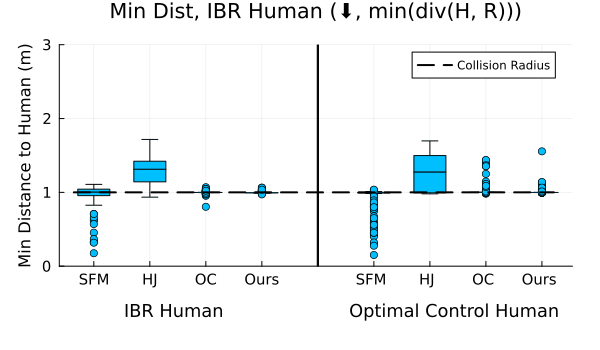

In [24]:
color = :deepskyblue

min_dist_plot = @df PHRI_oc_df_min_dist plot(size=(1000, 600), label="", title="Min Dist, IBR Human (⬇, min(div(H, R)))", ylabel="Min Distance to Human (m)", bottommargin=15mm, margins=5mm, ylims=[0, 3], grid=true, color=color, ytickfontsize=10, xtickfontsize=10, ann=[(2.5, -0.6, "IBR Human"), (9.5, -0.6, "Optimal Control Human")], annotationfontsize=12)
@df SFM_ibr_df_min_dist boxplot!(min_dist_plot, string.(:B), :A, label="", color=color)
@df HJ_ibr_df_min_dist boxplot!(min_dist_plot, string.(:B), :A, label="", color=color)
@df OC_ibr_df_min_dist boxplot!(min_dist_plot, string.(:B), :A, label="", color=color)
@df PHRI_ibr_df_min_dist boxplot!(min_dist_plot, string.(:B), :A, label="", color=color)
@df nothing_df_1 boxplot!(min_dist_plot, string.(:B), :A, label="", linewidth=2)
@df SFM_oc_df_min_dist boxplot!(min_dist_plot, string.(:B), :A, label="", color=color)
@df HJ_oc_df_min_dist boxplot!(min_dist_plot, string.(:B), :A, label="", color=color)
@df OC_oc_df_min_dist boxplot!(min_dist_plot, string.(:B), :A, label="", color=color)
@df PHRI_oc_df_min_dist boxplot!(min_dist_plot, string.(:B), :A, label="", color=color)
plot!([0., 12], [1., 1.], linestyle=:dash, color=:black, label="Collision Radius", linewidth=2)

min_dist_large = plot(min_dist_plot, size=(1500, 900), leftmargin=15mm, bottommargin=25mm)
min_dist_small = plot(min_dist_plot, size=(600, 350))

min_dist_small

# Combined PI Plots

In [25]:
nothing_data_1_string = ["" for i in 1:80]
nothing_data_2_string = [" " for i in 1:80]
nothing_data_3_string = ["  " for i in 1:80]
nothing_data_4_string = ["    " for i in 1:80]
nothing_data_5_string = ["   " for i in 1:80]
nothing_data_6_string = ["     " for i in 1:80]
nothing_data_7_string = ["      " for i in 1:80]

nothing_df_1 = DataFrame(A=nothing_data, B=nothing_data_1_string)
nothing_df_2 = DataFrame(A=nothing_data, B=nothing_data_2_string)
nothing_df_3 = DataFrame(A=nothing_data, B=nothing_data_3_string)
nothing_df_4 = DataFrame(A=nothing_data, B=nothing_data_4_string)
nothing_df_5 = DataFrame(A=nothing_data, B=nothing_data_5_string)
nothing_df_6 = DataFrame(A=nothing_data, B=nothing_data_6_string)
nothing_df_7 = DataFrame(A=nothing_data, B=nothing_data_7_string)

80×2 DataFrame
 Row │ A      B      
     │ Int64  String 
─────┼───────────────
   1 │   -90
   2 │   -90
   3 │   -90
   4 │   -90
   5 │   -90
   6 │   -90
   7 │   -90
   8 │   -90
  ⋮  │   ⋮      ⋮
  74 │    50
  75 │    50
  76 │    50
  77 │    50
  78 │    50
  79 │    50
  80 │    50
      65 rows omitted

In [26]:
f(y) = 15.9
g(y) = 11.7
h(y) = (15.9 + 11.7) / 2
y = 0:35

0:35

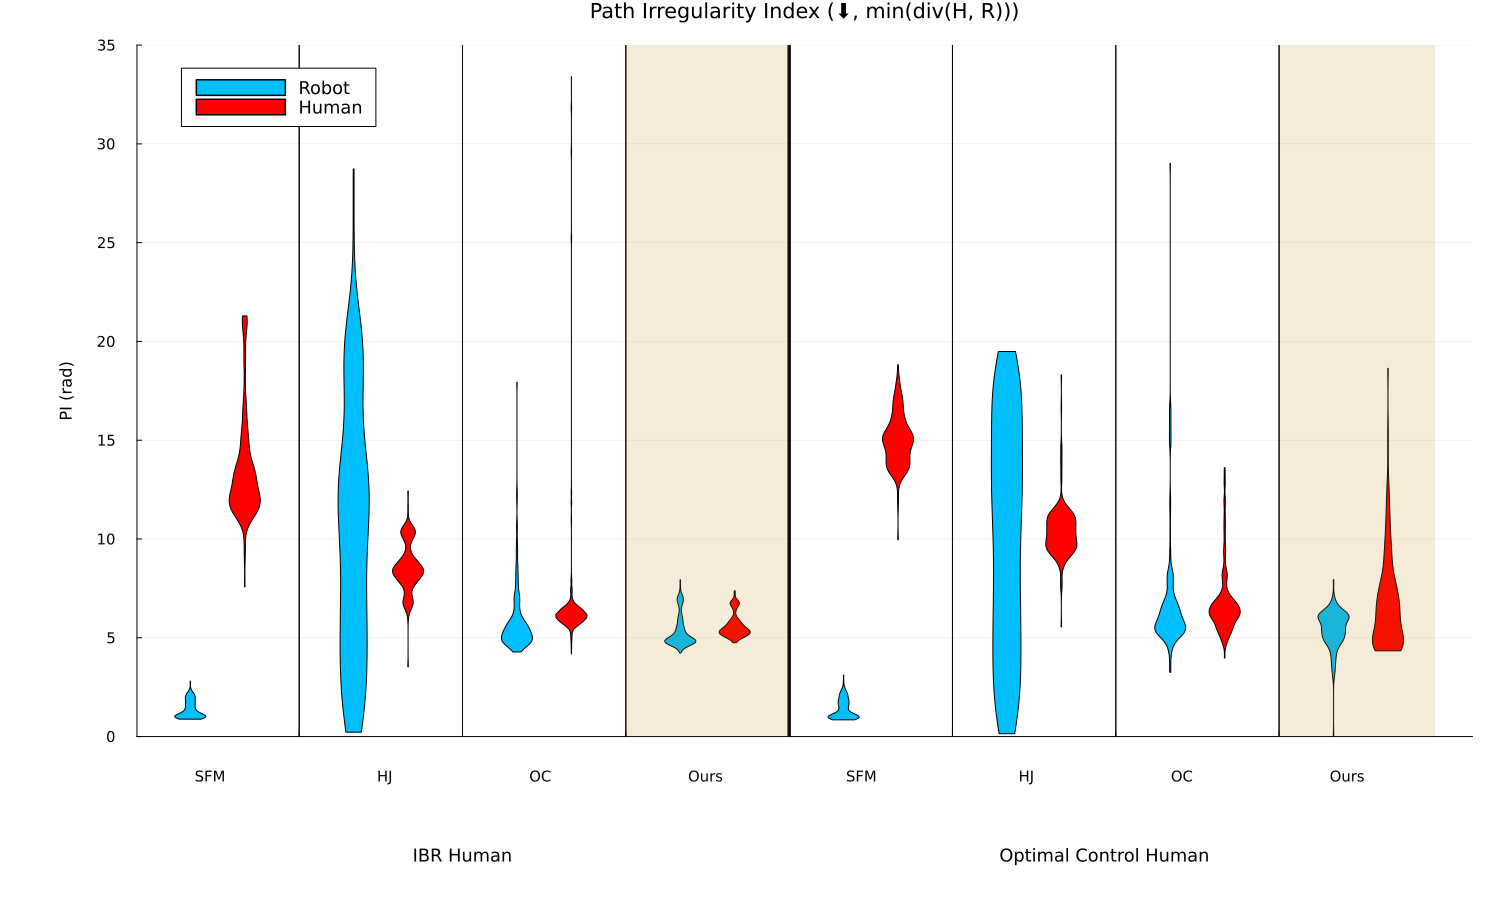

In [27]:
robot_color = :deepskyblue
human_color = :red

PI_plot = @df PHRI_robot_df violin(size=(1000, 350), label="Robot", title="Path Irregularity Index (⬇, min(div(H, R)))", bottommargin=15mm, ylabel="PI (rad)", margins=5mm, color=:blue, ylims=[0, 35], ytickfontsize=10, xtickfontsize=5, legendfontsize=12, linecolor=:match, ann=[(1, -2, "SFM"), (5.5, -2, "HJ"), (9.5, -2, "OC"), (13.75, -2, "Ours"), (17.75, -2, "SFM"), (22, -2, "HJ"), (26, -2, "OC"), (30.25, -2, "Ours")], annotationfontsize=10)
@df SFM_robot_df violin!(PI_plot, string.(:B), :A, color=robot_color, label="", linecolor=:black)
@df SFM_human_df violin!(PI_plot, string.(:B), :A, color=human_color, label="", linecolor=:black)
@df nothing_df_2 boxplot!(PI_plot, string.(:B), :A, label="")
@df HJ_robot_df violin!(PI_plot, string.(:B), :A, color=robot_color, label="", linecolor=:black)
@df HJ_human_df violin!(PI_plot, string.(:B), :A, color=human_color, label="", linecolor=:black)
@df nothing_df_3 boxplot!(PI_plot, string.(:B), :A, label="")
@df OC_robot_df violin!(PI_plot, string.(:B), :A, color=robot_color, label="", linecolor=:black)
@df OC_human_df violin!(PI_plot, string.(:B), :A, color=human_color, label="", linecolor=:black)
@df nothing_df_1 boxplot!(PI_plot, string.(:B), :A, label="")
@df PHRI_robot_df violin!(PI_plot, string.(:B), :A, color=robot_color, label="Robot", linecolor=:black)
@df PHRI_human_df violin!(PI_plot, string.(:B), :A, color=human_color, label="Human", linecolor=:black)
@df nothing_df_4 boxplot!(PI_plot, string.(:B), :A, label="", linewidth=3)
@df SFM_robot_df_oc violin!(PI_plot, string.(:B), :A, color=robot_color, label="", linecolor=:black)
@df SFM_human_df_oc violin!(PI_plot, string.(:B), :A, color=human_color, label="", linecolor=:black)
@df nothing_df_6 boxplot!(PI_plot, string.(:B), :A, label="")
@df HJ_robot_df_oc violin!(PI_plot, string.(:B), :A, color=robot_color, label="", linecolor=:black)
@df HJ_human_df_oc violin!(PI_plot, string.(:B), :A, color=human_color, label="", linecolor=:black)
@df nothing_df_7 boxplot!(PI_plot, string.(:B), :A, label="")
@df OC_robot_df_oc violin!(PI_plot, string.(:B), :A, color=robot_color, label="", linecolor=:black)
@df OC_human_df_oc violin!(PI_plot, string.(:B), :A, color=human_color, label="", linecolor=:black)
@df nothing_df_5 boxplot!(PI_plot, string.(:B), :A, label="")
@df PHRI_robot_df_oc violin!(PI_plot, string.(:B), :A, label="", linecolor=:black, color=robot_color)
@df PHRI_human_df_oc violin!(PI_plot, string.(:B), :A, color=human_color, label="", linecolor=:black)
# plot!(y, f.(y),fillrange=g.(y), fillalpha=0.3)
vspan!(PI_plot, [11.7, 15.9], fillalpha=0.15, label="", color=RGB(191/255, 121/255, 0))
vspan!(PI_plot, [28.5, 32.5], fillalpha=0.15, label="", color=RGB(191/255, 121/255, 0))
# plot!(g.(y), y, fillalpha=0.3)
PI_big = plot(PI_plot, size=(1500, 900), ann=[(7.5, -6, "IBR Human"), (24, -6, "Optimal Control Human")], annotationfontsize=12, bottommargin=35mm, leftmargin=20mm)
PI_small = plot(PI_plot, size=(600, 350), ann=[(7.5, -6, "IBR Human"), (24, -6, "Optimal Control Human")], annotationfontsize=12)
PI_big

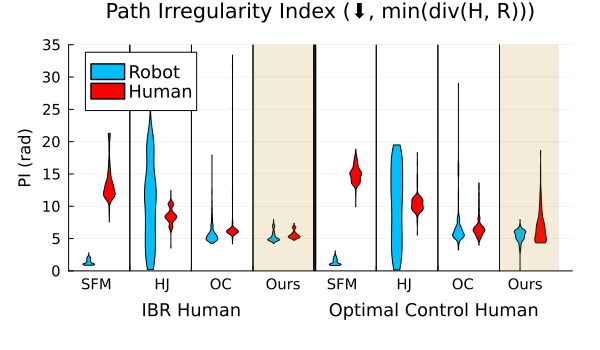

In [28]:
PI_small

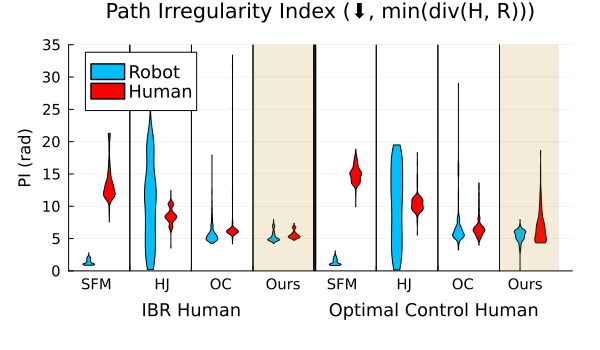

In [29]:
PI_small

In [30]:
# savefig( PI_big, "../ICRA2024.Figs/Geldenbott.Leung.ICRA.2024.PI_large.png")

SystemError: SystemError: opening file "/Users/jaspergeldenbott/repos/ProactiveHRI.jl/ICRA2024.Figs/Geldenbott.Leung.ICRA.2024.PI_large.png": No such file or directory

# Theta Plots w/ covariance

In [31]:
ego_θs = [proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].θ["Ego θ"] for i in 1:199]

199-element Vector{Vector{Float64}}:
 [NaN, 0.0, 2.580956827951785e-8, 2.1073424255447017e-8, 2.1073424255447017e-8, 1.4901161193847656e-8, 1.4901161193847656e-8, 2.1073424255447017e-8, 0.0, 0.0  …  0.03228644918359386, 0.04382115320395898, 0.05351525701321954, 0.048499744359498435, 0.05727935689755124, 0.06484697071942852, 0.07137586522991574, 0.07701214371021321, 0.08190267320982264, 0.08619069237204537]
 [NaN, 0.007853953520690243, 0.007853944368519033, 0.007853986404634132, 0.00785402211274548, 0.007853936519848411, 0.007854096634555517, 0.007853982982874746, 0.007853757171307733, 0.007853729370886358  …  0.020511544536668737, 0.020511528933574004, 0.020511513923138106, 0.0329803657759933, 0.04353481458510704, 0.0525039446394721, 0.06015496140856523, 0.061187853422783545, 0.06761287554344411, 0.07325129963295574]
 [NaN, 0.015707940173823598, 0.01570797342678721, 0.01570807290300366, 0.015708063859315124, 0.015707891318035825, 0.01570796282636449, 0.015707816065510572, 0.01570745237

In [32]:
ego_θs_matrix = vector_of_vectors_to_matrix(ego_θs)

199×50 Matrix{Float64}:
 NaN  0.0         2.58096e-8  2.10734e-8  …  0.0770121   0.0819027  0.0861907
 NaN  0.00785395  0.00785394  0.00785399     0.0611879   0.0676129  0.0732513
 NaN  0.0157079   0.015708    0.0157081      0.0503095   0.0570696  0.0630114
 NaN  0.0235619   0.0235619   0.0235622      0.0562345   0.0613857  0.0658607
 NaN  0.0314158   0.0314157   0.0314157      0.0424466   0.0480067  0.0528308
 NaN  0.0392696   0.0392694   0.0392694   …  0.0427166   0.046751   0.0502897
 NaN  0.0471237   0.0471233   0.0471237      0.0378907   0.0420601  0.0457014
 NaN  0.0549777   0.0549777   0.0549753      0.069557    0.0665171  0.0638472
 NaN  0.0628317   0.0628313   0.0628316      0.019305    0.0232646  0.026741
 NaN  0.0706851   0.0706848   0.0706847      0.00578996  0.0113029  0.0161187
   ⋮                                      ⋱                         
 NaN  0.0706851   0.0706845   0.0706844   …  0.142339    0.149356   0.155489
 NaN  0.0628317   0.0628314   0.062831       0.1302

In [33]:
for i in 1:199
    ego_θs_matrix[i, 2:50] .-= ego_θs_matrix[i, 2]
end


In [38]:
ego_θs_phri = [proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].θ["Ego θ"] for i in 1:199]
ego_θs_phri_matrix = vector_of_vectors_to_matrix(ego_θs_phri)
for i in 1:199
    ego_θs_phri_matrix[i, 2:50] .-= ego_θs_phri_matrix[i, 2]
end
avg_ego_θs_phri = [mean(ego_θs_phri_matrix[:, i]) for i in 2:50]
variance_phri = [var(ego_θs_phri_matrix[:, i]) for i in 2:50]



ego_θs_sfm = [SFM_robot_cooperative_human_head_on["Run $(i)"].θ["Ego θ"] for i in 1:199]
ego_θs_sfm_matrix = vector_of_vectors_to_matrix(ego_θs_sfm)
for i in 1:199
    ego_θs_sfm_matrix[i, 2:50] .-= ego_θs_sfm_matrix[i, 2]
end
avg_ego_θs_sfm = [mean(ego_θs_sfm_matrix[:, i]) for i in 2:50]
variance_sfm = [var(ego_θs_sfm_matrix[:, i]) for i in 2:50]




ego_θs_hj = [HJ_robot_cooperative_human_head_on["Run $(i)"].θ["Ego θ"] for i in 1:199]
ego_θs_hj_matrix = vector_of_vectors_to_matrix(ego_θs_hj)
for i in 1:199
    ego_θs_hj_matrix[i, 2:50] .-= ego_θs_hj_matrix[i, 2]
end
avg_ego_θs_hj = [mean(ego_θs_hj_matrix[:, i]) for i in 2:50]
variance_hj = [var(ego_θs_hj_matrix[:, i]) for i in 2:50]


ego_θs_oc = [OC_robot_cooperative_human_head_on["Run $(i)"].θ["Ego θ"] for i in 1:199]
ego_θs_oc_matrix = vector_of_vectors_to_matrix(ego_θs_oc)
for i in 1:199
    ego_θs_oc_matrix[i, 2:50] .-= ego_θs_oc_matrix[i, 2]
end
avg_ego_θs_oc = [mean(ego_θs_oc_matrix[:, i]) for i in 2:50]
variance_oc = [var(ego_θs_oc_matrix[:, i]) for i in 2:50]

49-element Vector{Float64}:
 0.0
 0.005010728786227924
 0.004768978158067988
 0.014911635213405869
 0.0034479165136336648
 0.002533308941397098
 0.004032554344165498
 0.0027536440773864913
 0.0029523589631807686
 0.003356268367960606
 ⋮
 0.0027254292319270406
 0.0017997763850682979
 0.0015094596999062962
 0.0017549303827482034
 0.0022538222749911253
 0.0028234593529315776
 0.003283828353813902
 0.003808625242447004
 0.004424207195464224

In [39]:
using Statistics

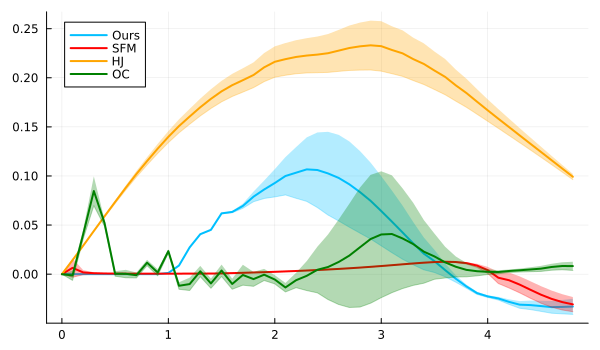

In [40]:
color = :deepskyblue
theta_plot = plot(0:0.1:4.8, avg_ego_θs_phri - variance_phri, fillrange=avg_ego_θs_phri + variance_phri, alpha=0.3, color=color, label="")
plot!(0:0.1:4.8, avg_ego_θs_phri, color=color, linewidth=2, label="Ours")

color = :red
plot!(0:0.1:4.8, avg_ego_θs_sfm - variance_sfm, fillrange=avg_ego_θs_sfm + variance_sfm, alpha=0.3, color=color, label="")
plot!(0:0.1:4.8, avg_ego_θs_sfm, color=color, linewidth=2, label="SFM")


color = :orange
plot!(0:0.1:4.8, avg_ego_θs_hj - variance_hj, fillrange=avg_ego_θs_hj + variance_hj, alpha=0.3, color=color, label="")
plot!(0:0.1:4.8, avg_ego_θs_hj, color=color, linewidth=2, label="HJ")


color = :green
plot!(0:0.1:4.8, avg_ego_θs_oc - variance_oc, fillrange=avg_ego_θs_oc + variance_oc, alpha=0.3, color=color, label="")
plot!(0:0.1:4.8, avg_ego_θs_oc, color=color, linewidth=2, label="OC")


theta_plot_small = plot(theta_plot, size=(600,350))


In [41]:
ego_θs_oc_phri = [proactiveHRI_robot_oc_human_head_on["Run $(i)"].θ["Ego θ"] for i in 1:199]
ego_θs_oc_phri_matrix = vector_of_vectors_to_matrix(ego_θs_oc_phri)
for i in 1:199
    ego_θs_oc_phri_matrix[i, 2:50] .-= ego_θs_oc_phri_matrix[i, 2]
end
avg_ego_θs_oc_phri = [mean(ego_θs_oc_phri_matrix[:, i]) for i in 2:50]
oc_variance_phri = [var(ego_θs_oc_phri_matrix[:, i]) for i in 2:50]

ego_θs_oc_sfm = [SFM_robot_oc_human_head_on["Run $(i)"].θ["Ego θ"] for i in 1:199]
ego_θs_oc_sfm_matrix = vector_of_vectors_to_matrix(ego_θs_oc_sfm)
for i in 1:199
    ego_θs_oc_sfm_matrix[i, 2:50] .-= ego_θs_oc_sfm_matrix[i, 2]
end
avg_ego_θs_oc_sfm = [mean(ego_θs_oc_sfm_matrix[:, i]) for i in 2:50]
oc_variance_sfm = [var(ego_θs_oc_sfm_matrix[:, i]) for i in 2:50]




ego_θs_oc_hj = [HJ_robot_oc_human_head_on["Run $(i)"].θ["Ego θ"] for i in 1:199]
ego_θs_oc_hj_matrix = vector_of_vectors_to_matrix(ego_θs_oc_hj)
for i in 1:199
    ego_θs_oc_hj_matrix[i, 2:50] .-= ego_θs_oc_hj_matrix[i, 2]
end
avg_ego_θs_oc_hj = [mean(ego_θs_oc_hj_matrix[:, i]) for i in 2:50]
oc_variance_hj = [var(ego_θs_oc_hj_matrix[:, i]) for i in 2:50]


ego_θs_oc_oc = [OC_robot_oc_human_head_on["Run $(i)"].θ["Ego θ"] for i in 1:199]
ego_θs_oc_oc_matrix = vector_of_vectors_to_matrix(ego_θs_oc_oc)
for i in 1:199
    ego_θs_oc_oc_matrix[i, 2:50] .-= ego_θs_oc_oc_matrix[i, 2]
end
avg_ego_θs_oc_oc = [mean(ego_θs_oc_oc_matrix[:, i]) for i in 2:50]
oc_variance_oc = [var(ego_θs_oc_oc_matrix[:, i]) for i in 2:50]

49-element Vector{Float64}:
 0.0
 0.005010280681991807
 0.003129699095991484
 0.007820575491997382
 0.0038484297171455977
 0.004271952799289749
 0.0065639638396399426
 0.009293417701429614
 0.013525770208611971
 0.018405699859619158
 ⋮
 0.0027577693783504696
 0.002696584847129794
 0.003057324646560451
 0.0037860108328624485
 0.004638165245145114
 0.005708906408496196
 0.006870042599518261
 0.008164742755998983
 0.008476689999239105

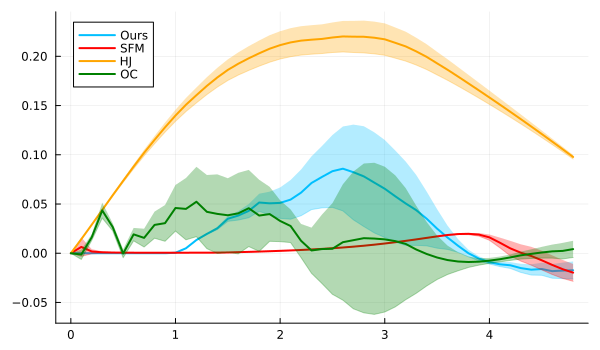

In [42]:
color = :deepskyblue
theta_plot = plot(0:0.1:4.8, avg_ego_θs_oc_phri - oc_variance_phri, fillrange=avg_ego_θs_oc_phri + oc_variance_phri, alpha=0.3, color=color, label="")
plot!(0:0.1:4.8, avg_ego_θs_oc_phri, color=color, linewidth=2, label="Ours")

color = :red
plot!(0:0.1:4.8, avg_ego_θs_oc_sfm - oc_variance_sfm, fillrange=avg_ego_θs_oc_sfm + oc_variance_sfm, alpha=0.3, color=color, label="")
plot!(0:0.1:4.8, avg_ego_θs_oc_sfm, color=color, linewidth=2, label="SFM")


color = :orange
plot!(0:0.1:4.8, avg_ego_θs_oc_hj - oc_variance_hj, fillrange=avg_ego_θs_oc_hj + oc_variance_hj, alpha=0.3, color=color, label="")
plot!(0:0.1:4.8, avg_ego_θs_oc_hj, color=color, linewidth=2, label="HJ")


color = :green
plot!(0:0.1:4.8, avg_ego_θs_oc_oc - oc_variance_oc, fillrange=avg_ego_θs_oc_oc + oc_variance_oc, alpha=0.3, color=color, label="")
plot!(0:0.1:4.8, avg_ego_θs_oc_oc, color=color, linewidth=2, label="OC")


theta_plot_small = plot(theta_plot, size=(600,350))


In [496]:
ego_dθ_dt_phri = [proactiveHRI_robot_cooperative_human_head_on["Run $(i)"].dθ_dt["Ego dθ/dt"] for i in 1:199]
ego_dθ_dt_phri_matrix = vector_of_vectors_to_matrix(ego_dθ_dt_phri)

avg_ego_dθ_dt_phri = [mean(ego_dθ_dt_phri_matrix[:, i]) for i in 2:49]
variance_phri = [var(ego_dθ_dt_phri_matrix[:, i]) for i in 2:49]



ego_dθ_dt_sfm = [SFM_robot_cooperative_human_head_on["Run $(i)"].dθ_dt["Ego dθ/dt"] for i in 1:199]
ego_dθ_dt_sfm_matrix = vector_of_vectors_to_matrix(ego_dθ_dt_sfm)

avg_ego_dθ_dt_sfm = [mean(ego_dθ_dt_sfm_matrix[:, i]) for i in 2:49]
variance_sfm = [var(ego_dθ_dt_sfm_matrix[:, i]) for i in 2:49]




ego_dθ_dt_hj = [HJ_robot_cooperative_human_head_on["Run $(i)"].dθ_dt["Ego dθ/dt"] for i in 1:199]
ego_dθ_dt_hj_matrix = vector_of_vectors_to_matrix(ego_dθ_dt_hj)

avg_ego_dθ_dt_hj = [mean(ego_dθ_dt_hj_matrix[:, i]) for i in 2:49]
variance_hj = [var(ego_dθ_dt_hj_matrix[:, i]) for i in 2:49]


ego_dθ_dt_oc = [OC_robot_cooperative_human_head_on["Run $(i)"].dθ_dt["Ego dθ/dt"] for i in 1:199]
ego_dθ_dt_oc_matrix = vector_of_vectors_to_matrix(ego_dθ_dt_oc)

avg_ego_dθ_dt_oc = [mean(ego_dθ_dt_oc_matrix[:, i]) for i in 2:49]
variance_oc = [var(ego_dθ_dt_oc_matrix[:, i]) for i in 2:49]

48-element Vector{Float64}:
 0.07221334109231113
 0.08394430104502051
 0.044809476251353286
 0.036455217600648376
 0.054769224305335595
 0.03615761325547706
 0.025882210935441796
 0.07705441406601203
 0.03616933785094873
 0.1269872266840657
 ⋮
 0.010083506332370295
 0.008670687732393267
 0.013209107669855278
 0.009220545643782793
 0.010246725440426634
 0.009087556731628943
 0.005544280124423521
 0.0016788262276210115
 0.02544544616421379

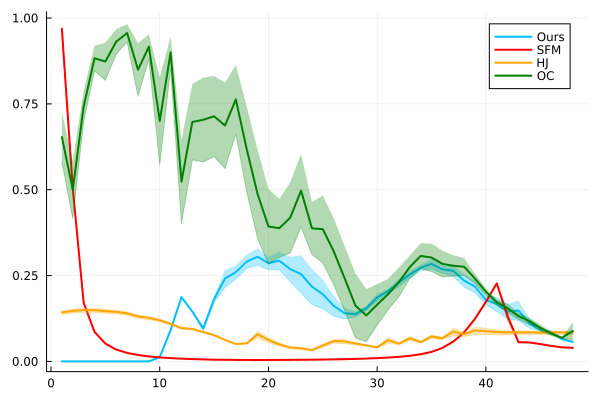

In [497]:
color = :deepskyblue
plot(1:48, avg_ego_dθ_dt_phri - variance_phri, fillrange=avg_ego_dθ_dt_phri + variance_phri, alpha=0.3, color=color, label="")
plot!(1:48, avg_ego_dθ_dt_phri, color=color, linewidth=2, label="Ours")

color = :red
plot!(1:48, avg_ego_dθ_dt_sfm - variance_sfm, fillrange=avg_ego_dθ_dt_sfm + variance_sfm, alpha=0.3, color=color, label="")
plot!(1:48, avg_ego_dθ_dt_sfm, color=color, linewidth=2, label="SFM")


color = :orange
plot!(1:48, avg_ego_dθ_dt_hj - variance_hj, fillrange=avg_ego_dθ_dt_hj + variance_hj, alpha=0.3, color=color, label="")
plot!(1:48, avg_ego_dθ_dt_hj, color=color, linewidth=2, label="HJ")


color = :green
plot!(1:48, avg_ego_dθ_dt_oc - variance_oc, fillrange=avg_ego_dθ_dt_oc + variance_oc, alpha=0.3, color=color, label="")
plot!(1:48, avg_ego_dθ_dt_oc, color=color, linewidth=2, label="OC")